In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv(r"C:\Users\MsK_PC\360digiTMG\Data_Science\DS_TMT_Steel_Project\Client_data\Dataset.csv")

In [3]:
d= df.duplicated()
sum(d)

66

In [4]:
df1= df.drop_duplicates()
df1

,Date,FY,Products,dia,dia group,grade,type,length,Voucher Type,Quantity,Rate,Value
0,04-03-2017,FY 18,25MM TATA TISCON FE500D (S),25 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales,25.49,40000.0,1019600.0
1,04-03-2017,FY 18,08MM TATA TISCON FE500D (S),08 MM,08 MM,500D,FULL LENGTH,12 METER,Sales,9.09,43200.0,392688.0
2,04-03-2017,FY 18,10MM TATA TISCON FE500D (S),10 MM,10 MM,500D,FULL LENGTH,12 METER,Sales,3.94,41700.0,164298.0
3,04-03-2017,FY 18,12MM TATA TISCON FE500D (S),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales,1.93,41200.0,79516.0
4,04-03-2017,FY 18,16MM TATA TISCON FE500D (S),16 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales,1.03,41200.0,42436.0
...,...,...,...,...,...,...,...,...,...,...,...,...
33040,3/25/2023,FY 23,20MM TATA TISCON FE500D (T),20 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales A/c GST,4.08,60000.0,244800.0
33041,3/30/2023,FY 23,08MM TATA TISCON FE550D (T),08 MM,08 MM,550D,FULL LENGTH,12 METER,Credit Note,-1.07,61000.0,-65270.0
33042,3/30/2023,FY 23,10MM TATA TISCON FE550D (T),10 MM,10 MM,550D,FULL LENGTH,12 METER,Credit Note,-1.50,60000.0,-90000.0
33043,3/30/2023,FY 23,12MM TATA TISCON FE550D (T),12 MM,12 MM - 32 MM,550D,FULL LENGTH,12 METER,Credit Note,-20.04,59000.0,-1182360.0


In [5]:
df2 = df1[df1["dia"]=="12 MM"]
df2

,Date,FY,Products,dia,dia group,grade,type,length,Voucher Type,Quantity,Rate,Value
3,04-03-2017,FY 18,12MM TATA TISCON FE500D (S),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales,1.93,41200.00,79516.00
7,04-04-2017,FY 18,12MM TATA TISCON FE500D (S),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales,15.24,37976.19,578757.14
10,04-06-2017,FY 18,12MM TATA TISCON FE500D (S),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales,14.62,41500.00,606730.00
25,04-06-2017,FY 18,12MM TATA TISCON FE500D (S),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales,3.03,41000.00,124230.00
33,04-07-2017,FY 18,12MM TATA TISCON FE500D (S),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales,5.15,40800.00,210120.00
...,...,...,...,...,...,...,...,...,...,...,...,...
33024,03-07-2023,FY 23,12MM TATA TISCON FE500D (T),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales A/c GST,9.98,61950.00,618261.00
33027,03-10-2023,FY 23,12MM TATA TISCON FE500D (T),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales A/c GST,15.16,63200.00,958112.00
33031,3/23/2023,FY 23,12MM TATA TISCON FE550D (T),12 MM,12 MM - 32 MM,550D,FULL LENGTH,12 METER,Sales A/c GST,2.09,60400.00,126236.00
33038,3/25/2023,FY 23,12MM TATA TISCON FE500D (T),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales A/c GST,8.66,60000.00,519600.00


In [6]:
# Converting the data type of Date column
df2['Date'] = pd.to_datetime(df2['Date'], format= 'mixed')

C:\Users\MsK_PC\AppData\Local\Temp\ipykernel_12396\2448041773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Date'] = pd.to_datetime(df2['Date'], format= 'mixed')


In [7]:

# Step 1: Data Preprocessing
X = df2[['Date']]  # Features: 'Date', "Value"
y = df2['Quantity']  # Target variable: 'Quantity'



In [8]:
# Convert 'Date' to numerical representation (e.g., days since start)
X['Date'] = (X['Date'] - X['Date'].min()).dt.days


C:\Users\MsK_PC\AppData\Local\Temp\ipykernel_12396\2216419481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Date'] = (X['Date'] - X['Date'].min()).dt.days


In [9]:
X

,Date
3,0
7,1
10,3
25,3
33,4
...,...
33024,2164
33027,2167
33031,2180
33038,2182


In [10]:
df2.Date

3       2017-04-03
7       2017-04-04
10      2017-04-06
25      2017-04-06
33      2017-04-07
           ...    
33024   2023-03-07
33027   2023-03-10
33031   2023-03-23
33038   2023-03-25
33043   2023-03-30
Name: Date, Length: 6557, dtype: datetime64[ns]

In [11]:
# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Step 3: Model Training
model = xgb.XGBRegressor()
model.fit(X_train, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [13]:
# Step 5: Model Evaluation
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")



Root Mean Squared Error: 5.8544985895578


In [14]:
y_pred

array([4.519352 , 5.7297835, 4.2142615, ..., 8.04735  , 5.082094 ,
       7.588745 ], dtype=float32)

In [16]:
import random
# Step 6: Forecasting

#min_sales_lakhs = 10  
#max_sales_lakhs = 50  
# Convert lakhs to individual units (1 lakh = 100,000)
#min_value = min_sales_lakhs * 1000
#max_value = max_sales_lakhs * 100000


# Generate future dates for which you want to make forecasts
future_dates = pd.date_range(start=df2['Date'].max() + pd.DateOffset(days=1), periods=365, freq='D')

# Calculate the corresponding x-axis values for the future dates
future_dates_numeric = (future_dates - df2['Date'].min()).days

# Generate a list of random values for the 'Value' column
#random_values = [random.uniform(min_value, max_value) for _ in range(len(future_dates_numeric))]

# Create a DataFrame for forecasting with 'Date' and 'Value'
X_forecast = pd.DataFrame({'Date': future_dates_numeric})#,'Value': random_values})

# Predict quantities for the future dates using the trained model
forecasted_quantities = model.predict(X_forecast)


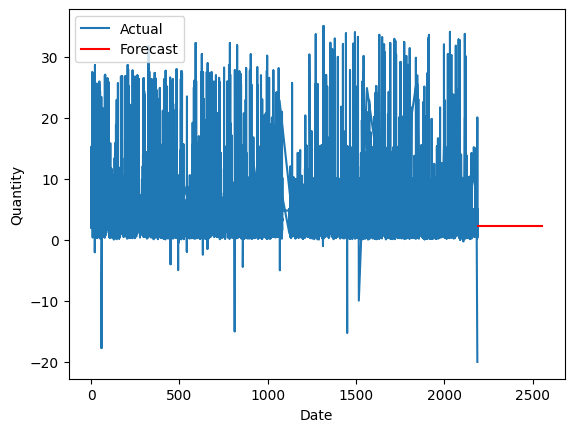

In [17]:
# Step 7: Visualization
plt.plot(X['Date'], y, label='Actual')
plt.plot(future_dates_numeric, forecasted_quantities, color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()